# 결정트리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 2.3.5 결정트리(decision tree)

## 공통
이건 아주 별로인 방법

In [2]:
# %config = ipynb 설정값
%config InlineBackend.figure_format = "retina" 
%config InlineBackend.figure_formats = ["pdf", "svg"] # vector drawing 방식으로 저장해

In [3]:
# error가 나는게 정상 16라인이 버전이 안 맞아
from preamble import *

## 결정 트리를 활용한 분류

### mglearn 라이브러리의 plots 모듈의 `plot_animal_tree` 함수를 실행하세요.
- Graphviz를 설치(https://graphviz.org/download/)해야 합니다.
- graphviz 파이썬 패키지도 설치해야 합니다.

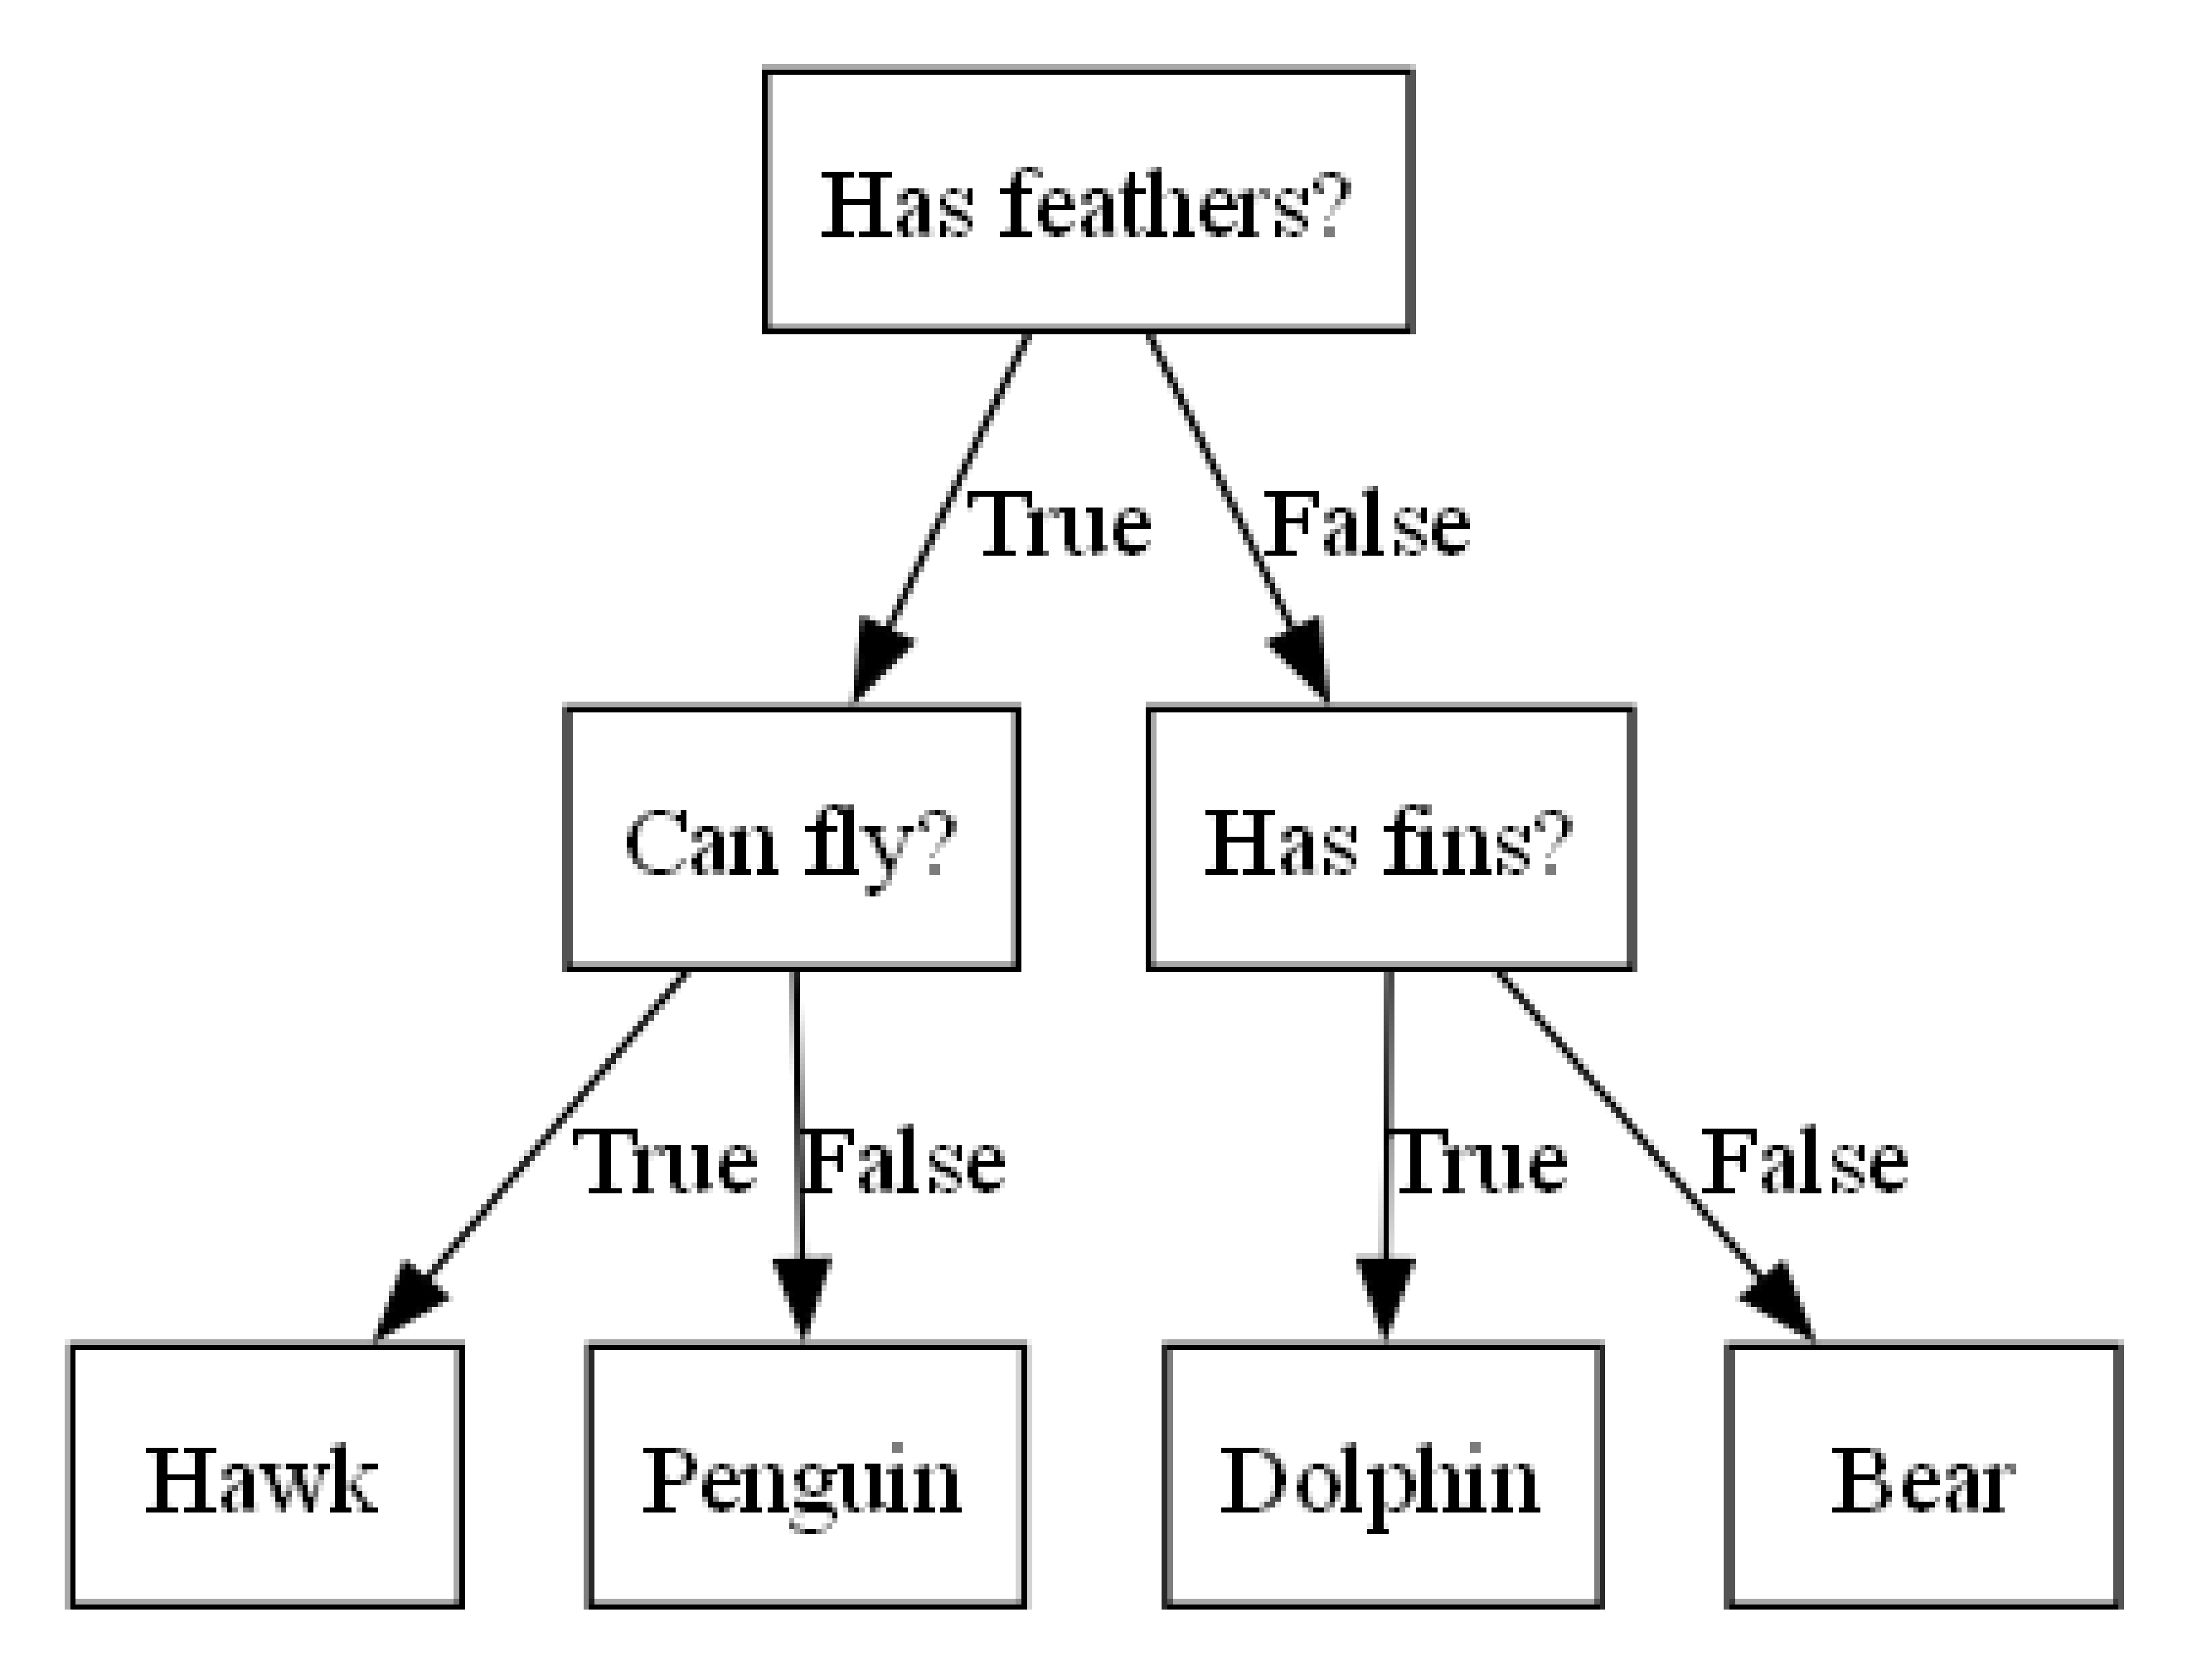

In [4]:
mglearn.plots.plot_animal_tree()

In [5]:
# mglearn.plot_animal_tree() 실행하면
# 'module' object is not callable

### mglearn 라이브러리의 plots 모듈의 `plot_tree_progressive` 함수를 실행하세요.

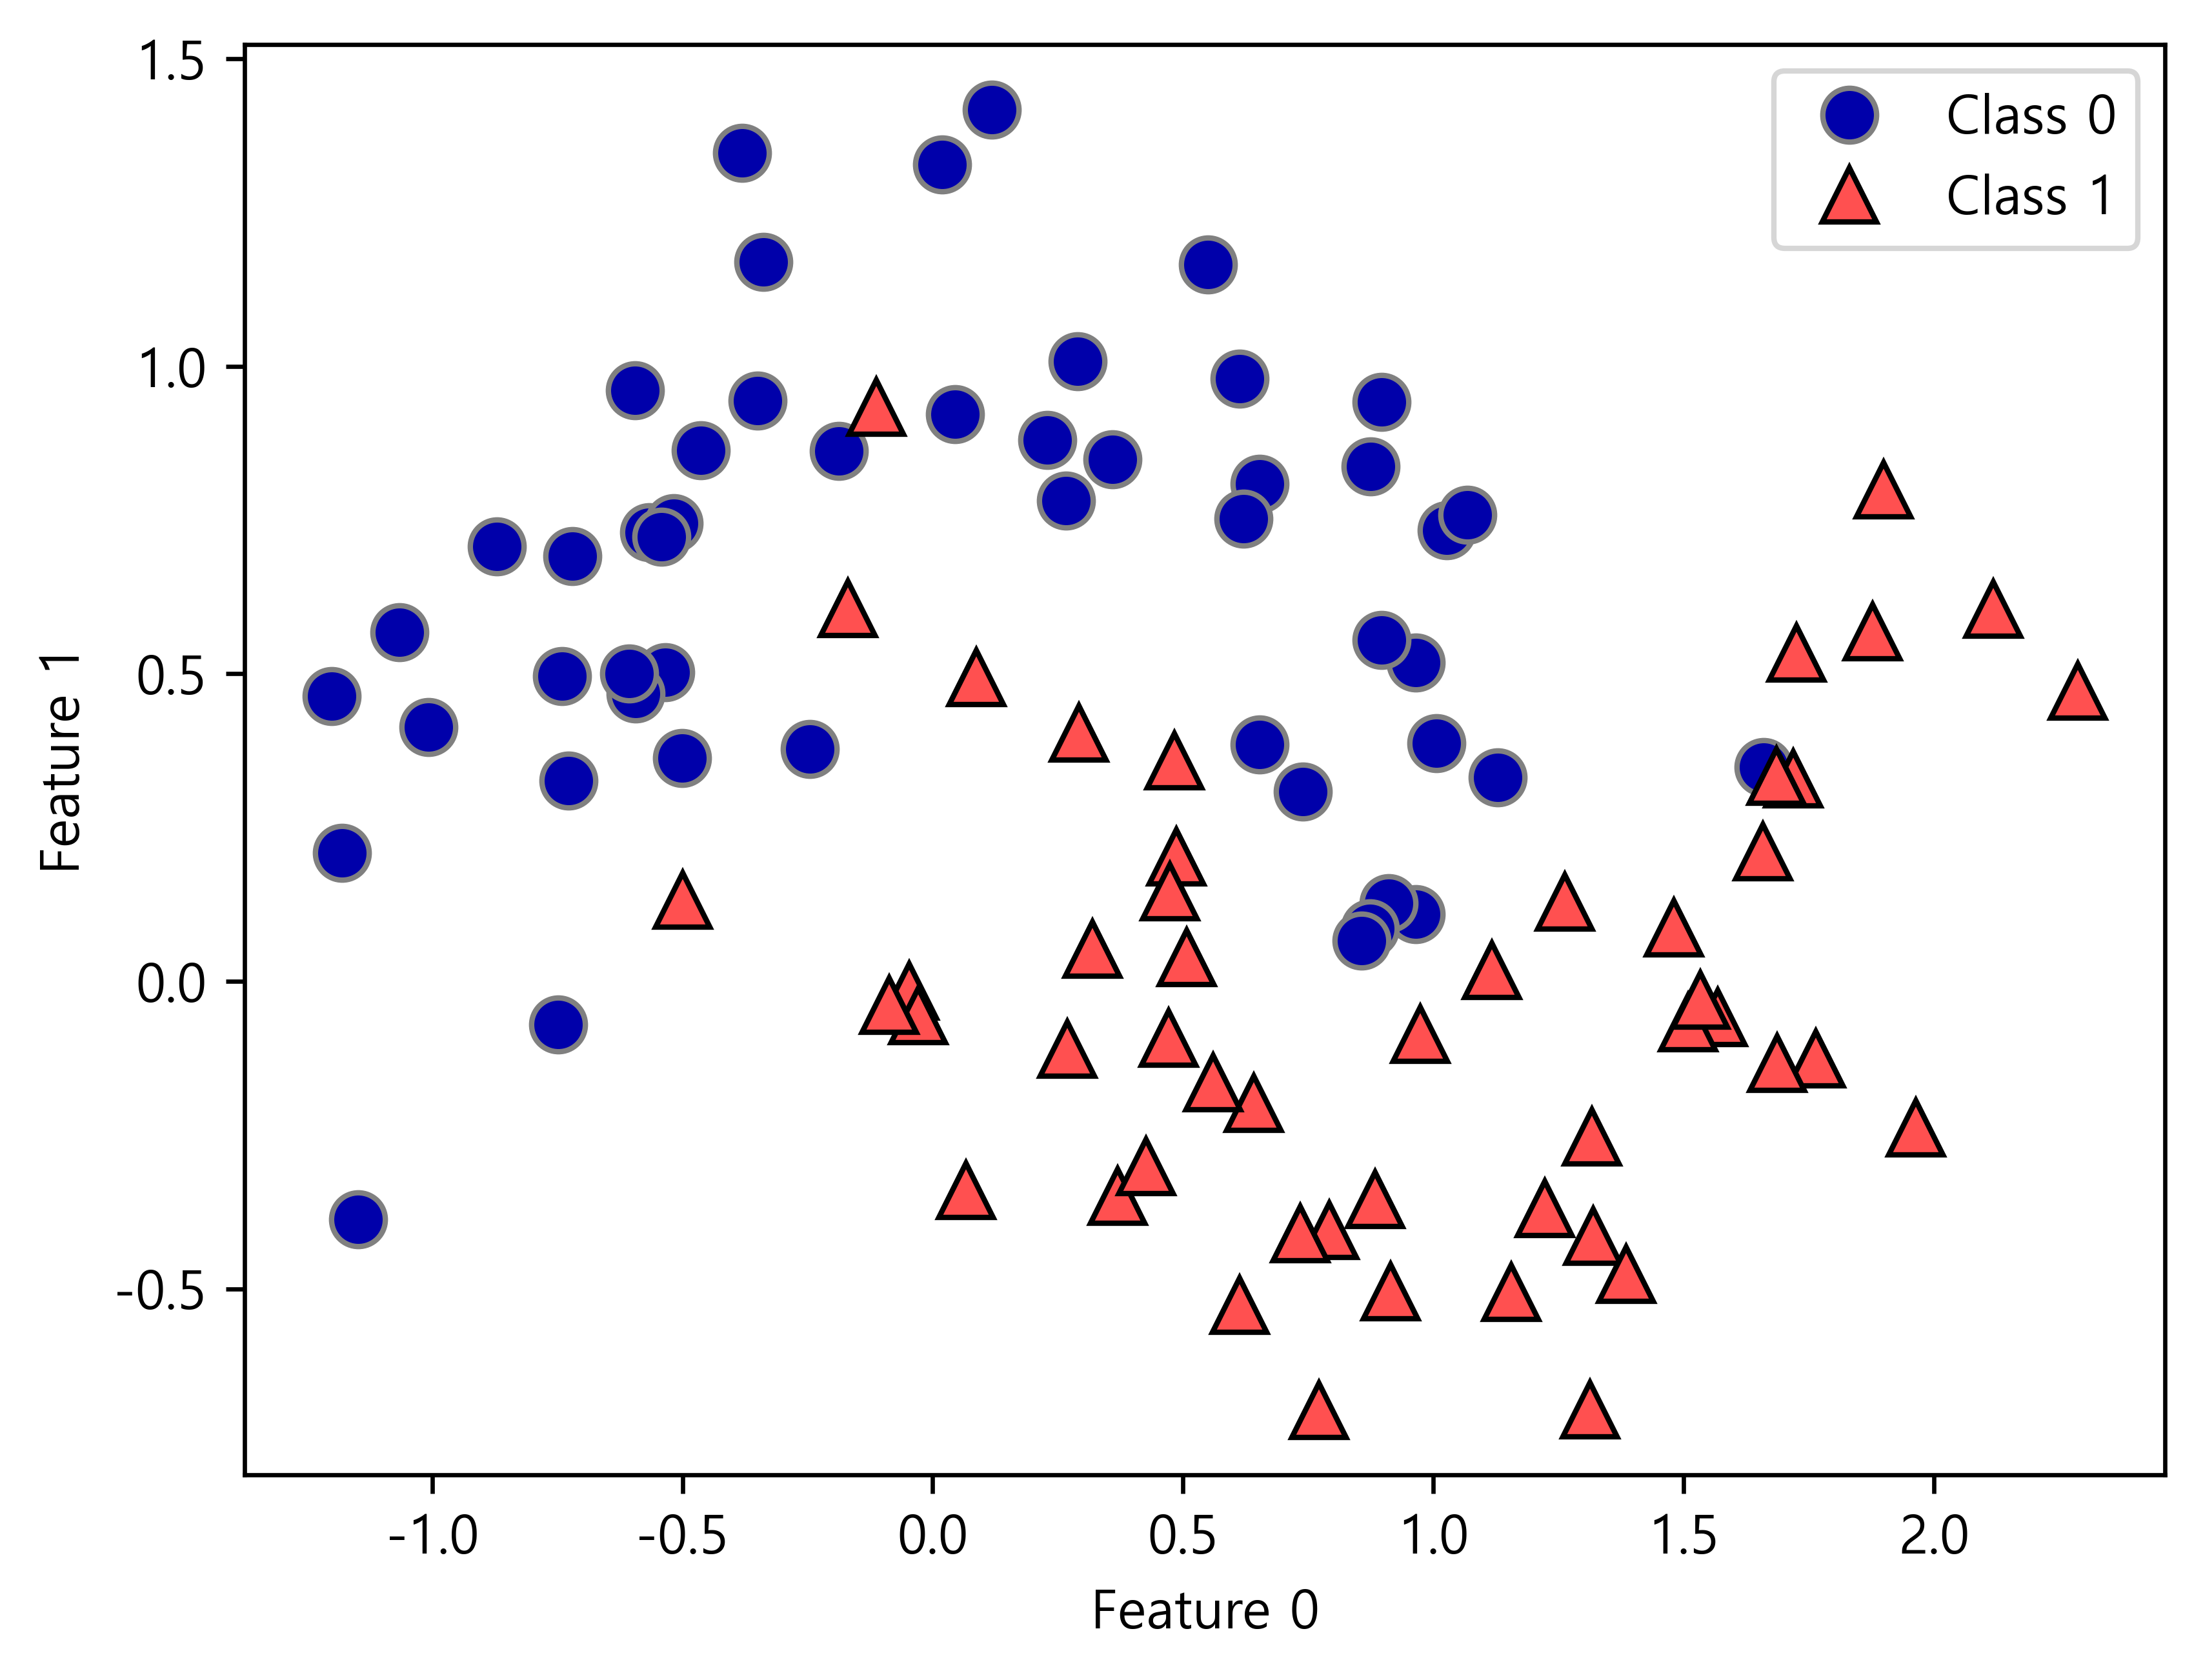

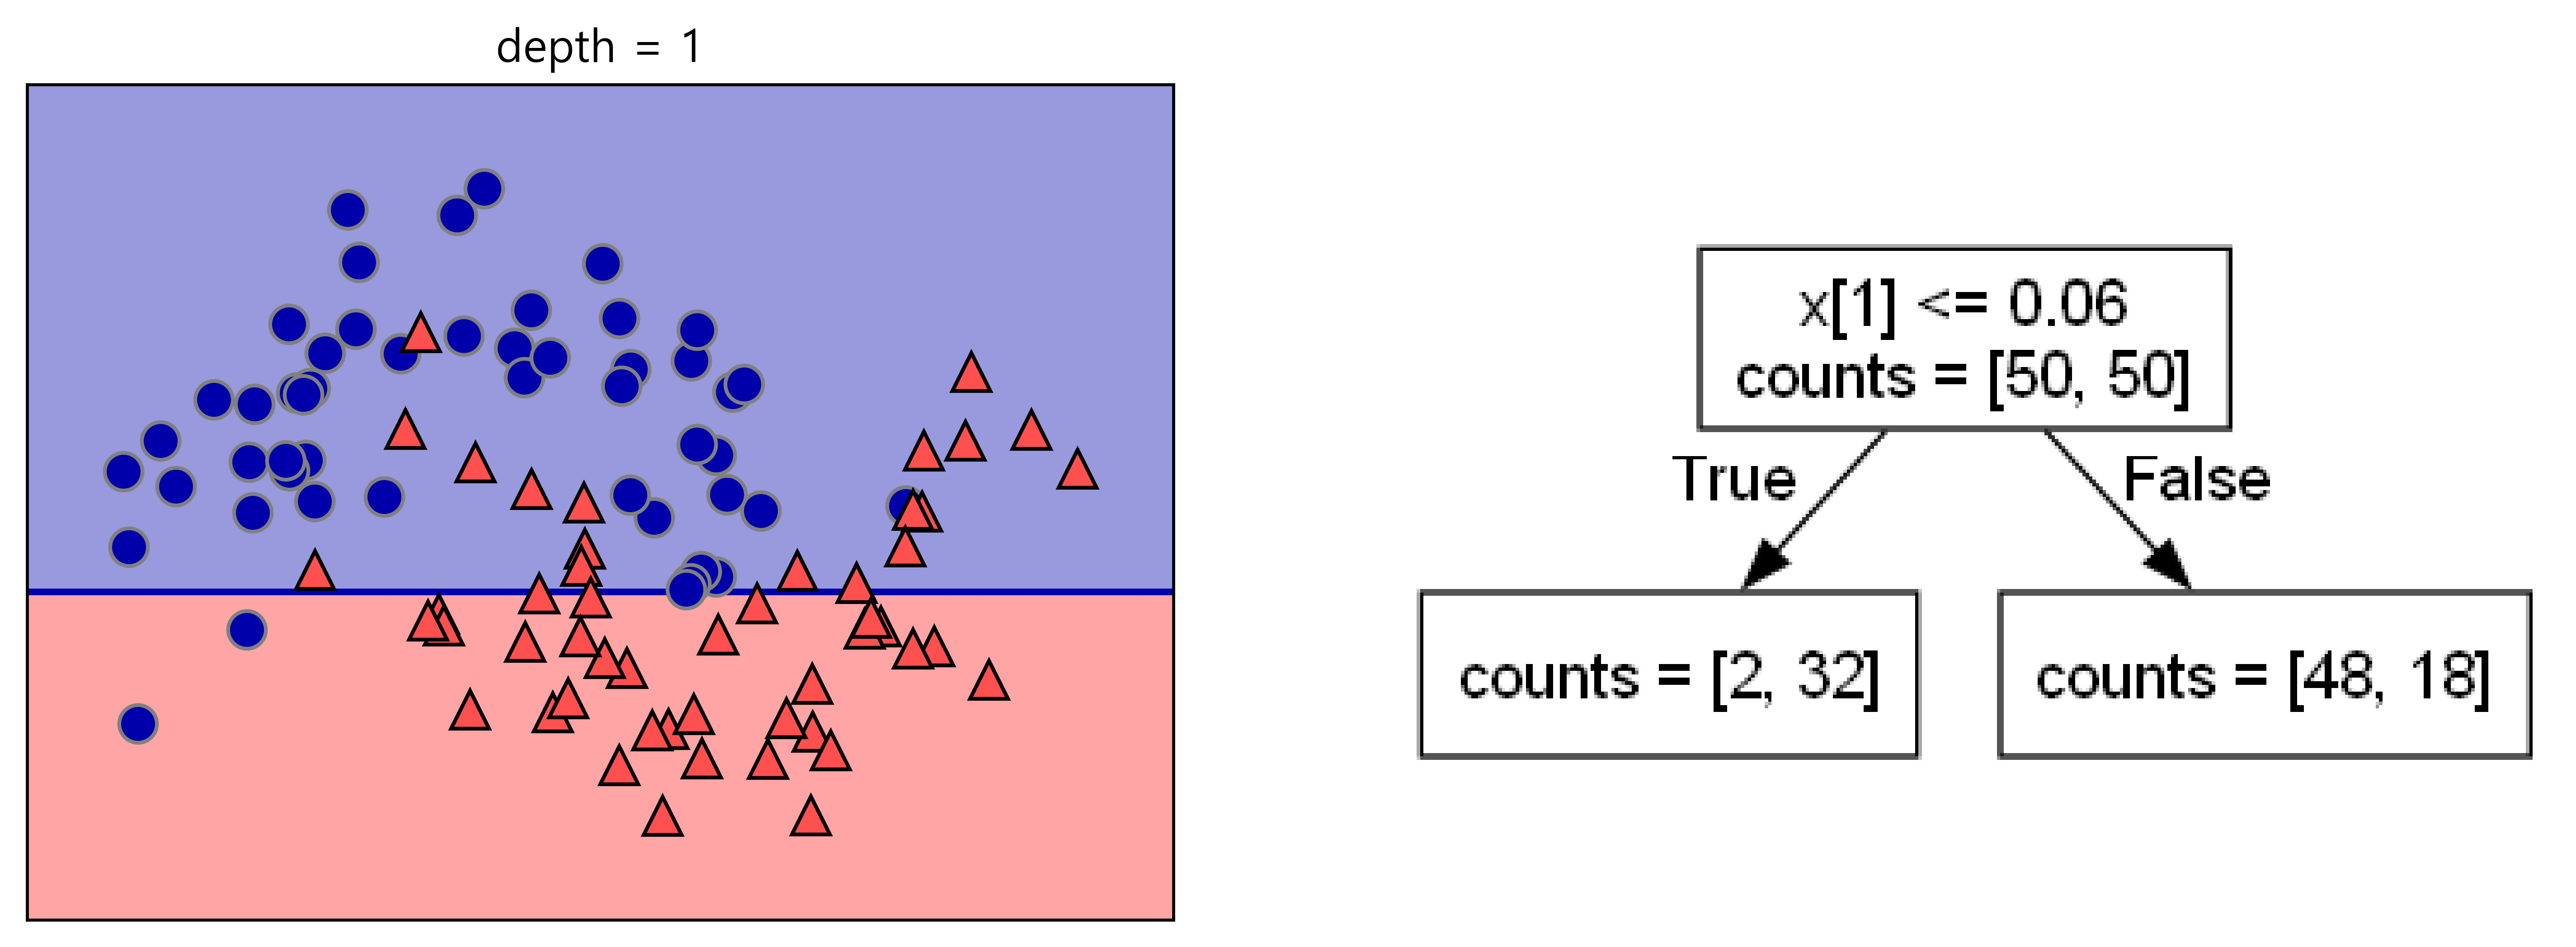

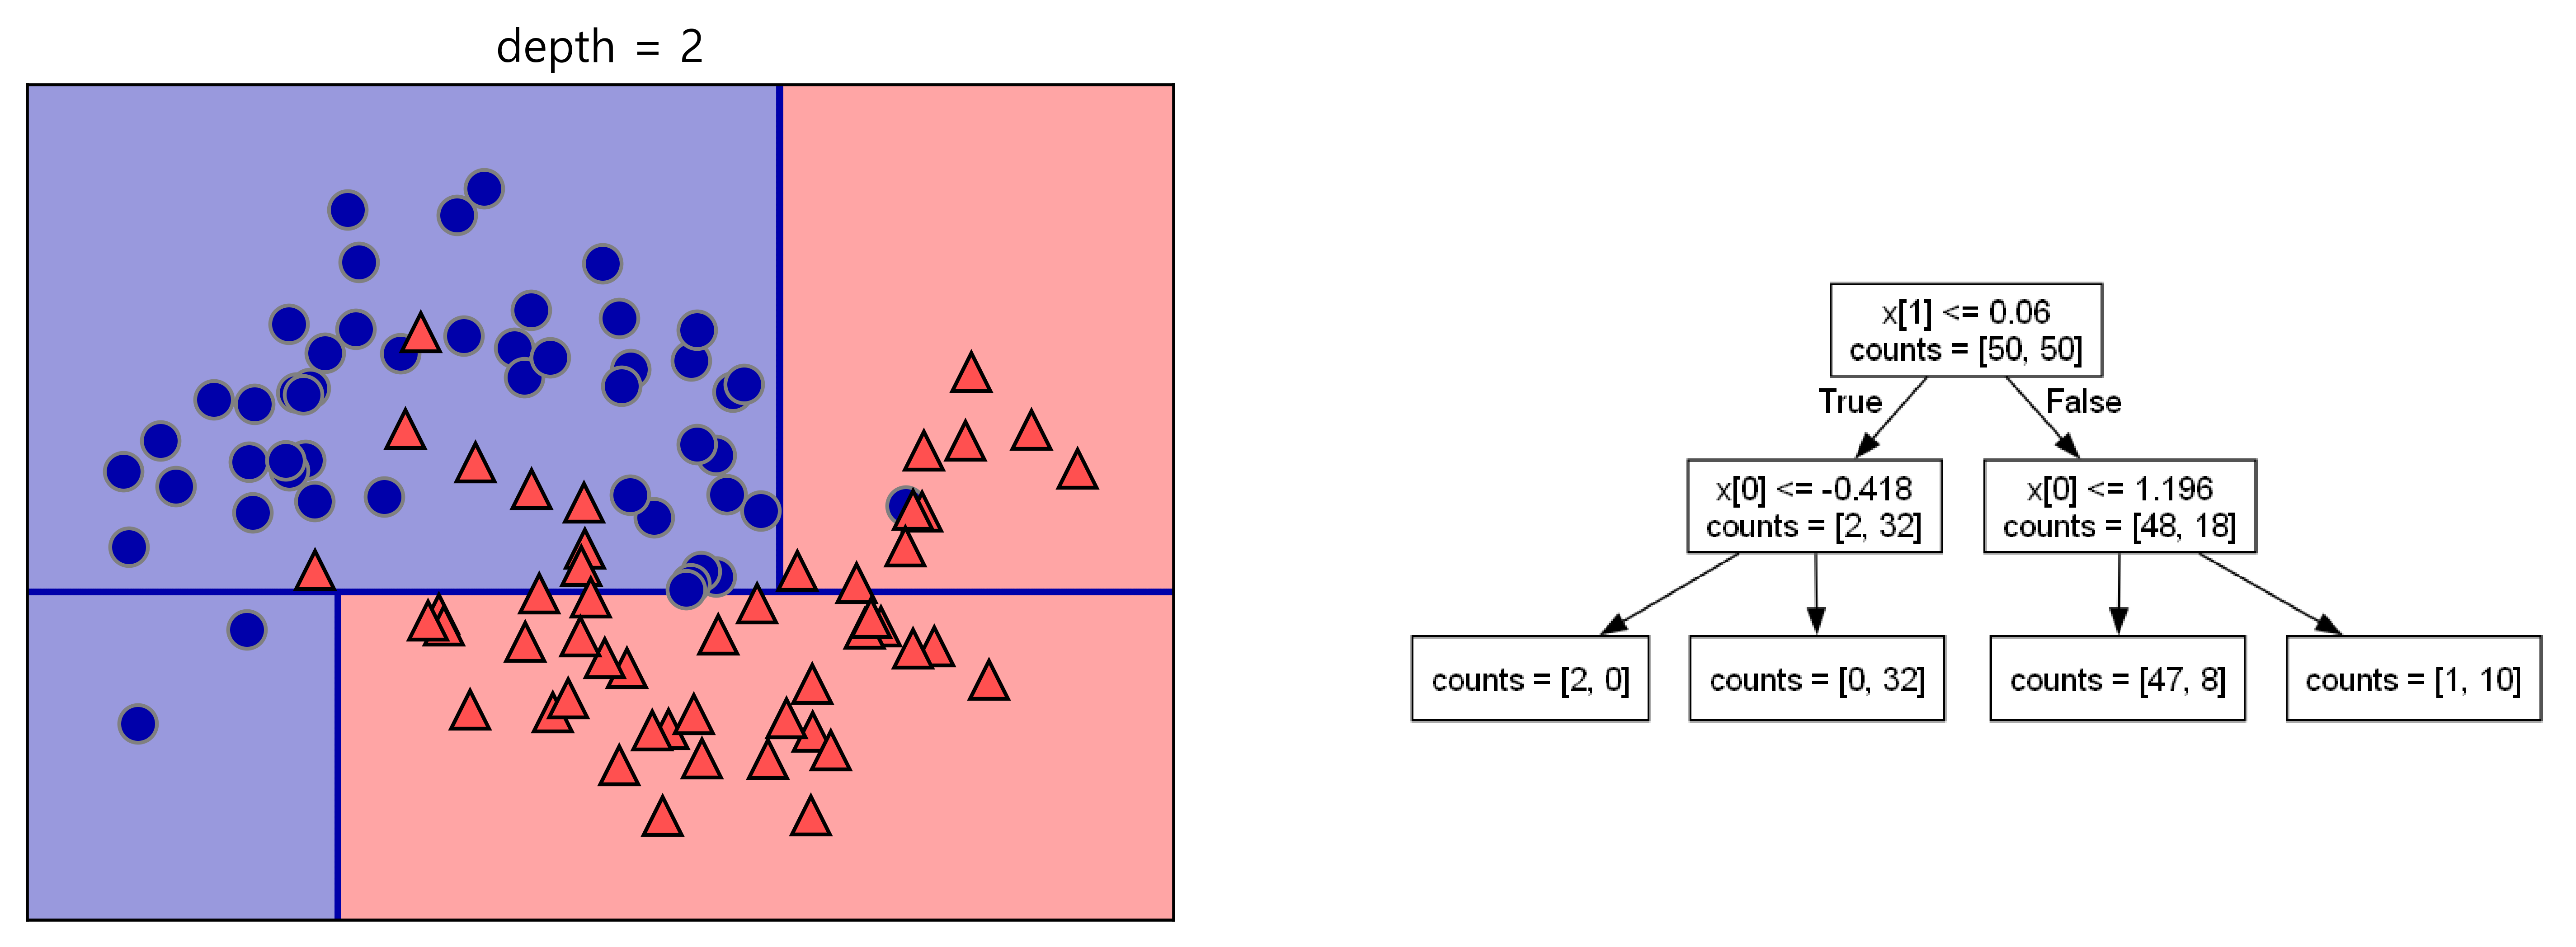

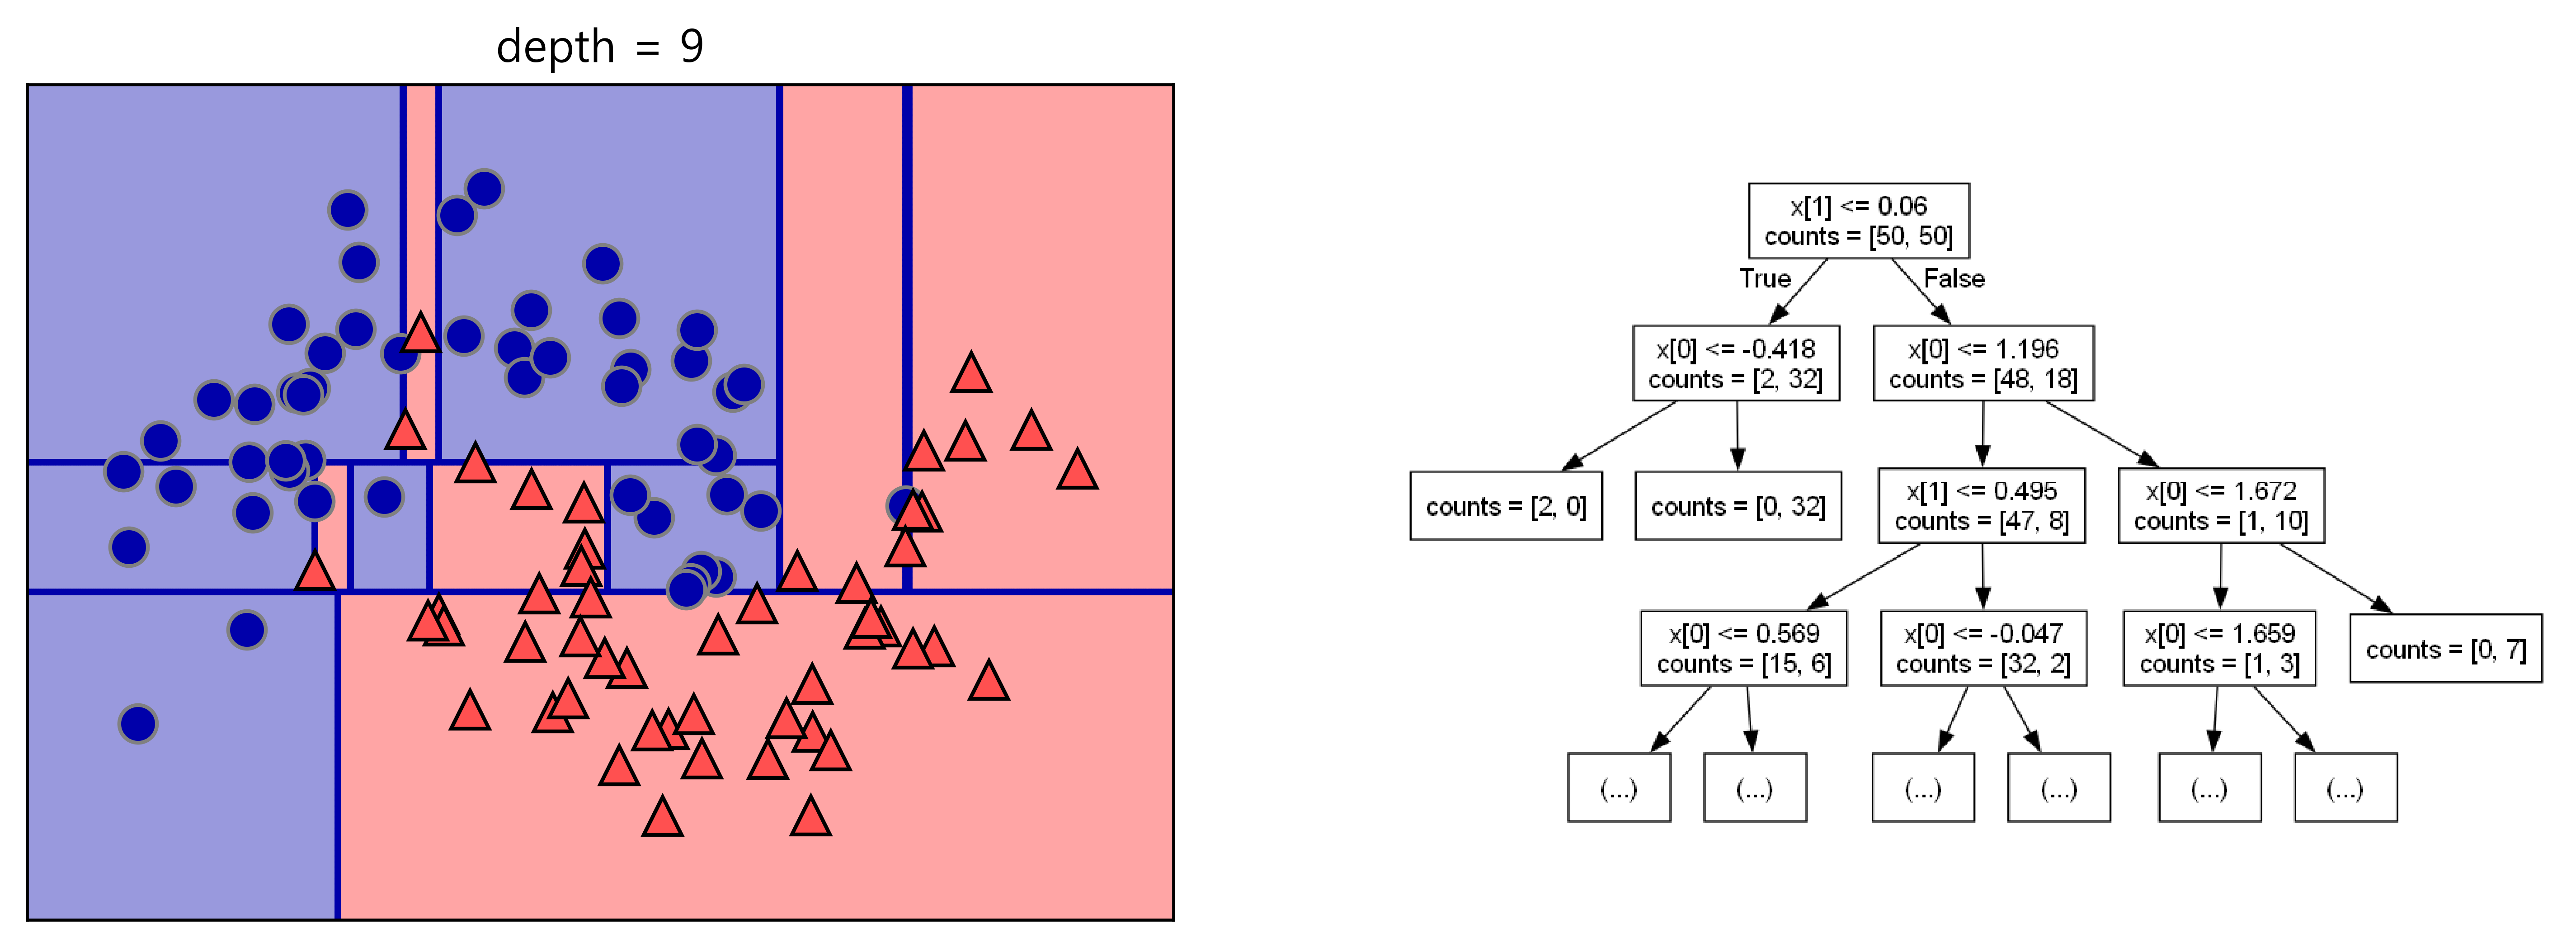

In [6]:
mglearn.plots.plot_tree_progressive()

### DT-Q1. DecisionTreeClassifier를 사용해서 분류 문제를 해결하세요.

> 아래 문제는 하나의 셀에 작성하세요. 여러 셀에 걸쳐서 작성하게 코드가 부분적으로 떨어져 있어서 가독성이 좋지 않습니다.

- [V] DT-Q1(a). 유방암 데이터를 불러오세요.
- [V] DT-Q1(b). 학습(train) 데이터와 테스트(test) 데이터로 분류하세요. 단, 분류 문제의 특성을 고려하세요.
- [V] DT-Q1(c). 결정 트리 학습기 객체를 생성하세요.
- [V] DT-Q1(d). 결정 트리 학습기를 사용해서 학습을 진행하세요.
- [V] DT-Q1(e). 훈련 정확도와 테스트 정확도를 소숫점 3자리까지 표시하세요.

우리는 현재 대부분 지도를 학습할거야  
근데 실무는 왜 비지도가 주류일까?  
지도는 정답이 필요한데 그 정답이 비싸!  
대표적 예시: LLM에 회의적인 상황 -> 알바생들이 수없이 눌러서 온도를 맞춘다.

훈련, 검증 데이터를 분류할 때  
- 데이터 분류에 드는 비용 문제 : 걍 외워버려! 많으면 8:2, 적으면 7:3
- 데이터 편향성 문제 : 비율 균등으로 나눠주세요


def train_test_split(  
    *arrays,  
    test_size=None,  
    train_size=None,  
    random_state=None,  
    shuffle=True,  
    stratify=None,  
)  
*는 tuple형태의 input을 기대한다!
cancer.data가 좋겠군 근데 pandas로 가능해?

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer() 
# type(cancer) = sklearn.utils._bunch.Bunch 형태는 {} -> set or dic / set은 중복은 삭제 but 데이터에서 중복을 지운다? 말도 안돼 광휘적으로 dic
# dir(cancer) 
# cancer.keys()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) # random_state가 없다면? 학습시 결과가 매번 달라버려
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print(f"훈련 정확도 : {dt.score(X_train, y_train)}") # 1.0은 사실상 나올 수 없는 수치 x축을 점근선으로 가지는 특성 -> 의심해
# 99.9%는 컴퓨터 입장에서 아주 작은 수치 0.99999정도는 돼야 1의 근사로 본다
print(f"테스트 정확도 : {dt.score(X_test, y_test)}")

훈련 정확도 : 1.0
테스트 정확도 : 0.9230769230769231


### DT-Q2. DecisionTreeClassifier를 사용해서 분류 문제를 개선하세요.

> 아래 문제는 하나의 셀에 작성하세요. 여러 셀에 걸쳐서 작성하게 코드가 부분적으로 떨어져 있어서 가독성이 좋지 않습니다.

- [V] DT-Q2(a). 결정 트리 학습기 객체를 생성할 때, 트리의 최대 높이를 `4`로 제한하세요.
- [V] DT-Q2(b). 결정 트리 학습기를 사용해서 학습을 진행하세요.
- [V] DT-Q2(c). 훈련 정확도와 테스트 정확도를 소숫점 3자리까지 표시하세요.

자료구조
- 선형 자료구조
- 비선형 자료구조
  - 그래프 자료구조
  - 트리 자료구조 (depth를 통한 제한)
  - 힙 자료구조 : 그래프를 기반한 트리 자료구조

In [8]:
# 1.0, 1.0을 목표로 하는 것은 꿈의 목표, 과대적합이 아님도 증명해내야 하는 deep한 문제
# 훈련생들의 관점에서 훈련정확도와 테스트 정확도 사이의 차이를 줄이는 것이 바람직한 목표(가능하면 오차가 작았으면 좋겠다)
## 2나 3이나 별로 차이가 안 나는 이유? 암은 많은 사람들이 걸리지 않아
## 또 다른 예시) 항공 사고로 인한 사망자 수
## 데이터 분석은 나의 논리(관점)로 상대를 설득하는 것
dt = DecisionTreeClassifier(max_depth=3, random_state=42) 
dt.fit(X_train, y_train)
print(f"훈련 정확도 : {dt.score(X_train, y_train)}")
print(f"테스트 정확도 : {dt.score(X_test, y_test)}")

훈련 정확도 : 0.9765258215962441
테스트 정확도 : 0.9440559440559441


### DT-Q3. Graphviz를 활용한 DecisionTreeClassifier를 시각적으로 표현하세요.
- [V] DT-Q3(a). 결정 트리 학습기 객체를 생성할 때, 트리의 최대 높이를 `4`로 제한하세요.
    - 수업에선 교재에 있는 내용을 설명하지만, 학습을 위해서 가능하면 공식 홈페이지(https://scikit-learn.org/dev/modules/generated/sklearn.tree.export_graphviz.html) 참고하세요.
        - out_file
        - class_names
        - feature_names
        - impurity
        - filled
    - 결정트리 시각화는 결과 분석을 위해서 중요하니 꼭 알아두세요.

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(dt, 
                out_file="dt.dot", 
                class_names=["F", "T"])

- [V] DT-Q3(b). matplotlib를 사용해서 `dot` 파일을 출력하세요.

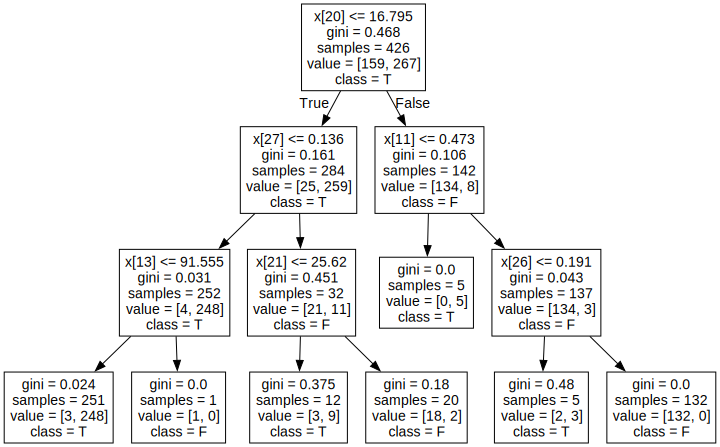

In [10]:
import graphviz
with open("dt.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

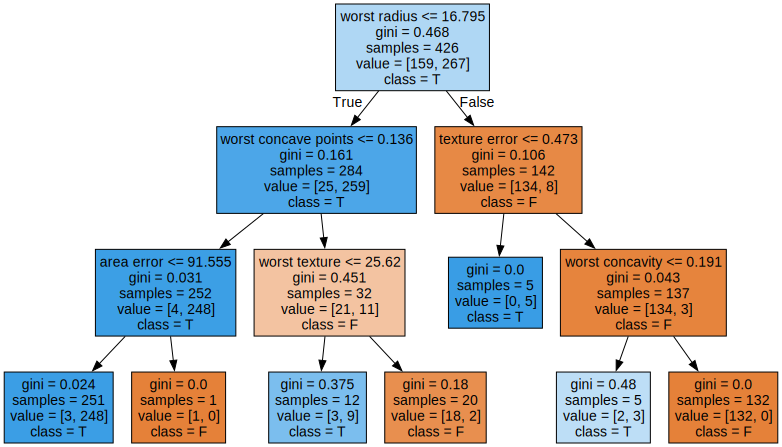

In [11]:
export_graphviz(dt, 
                out_file="dt.dot", 
                class_names=["F", "T"], 
                feature_names=cancer.feature_names, 
                filled=True)
with open("dt.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

- [V] DT-Q3(c). scikit-learn에서 제공하는 `plot_tree` 함수를 활용하세요.

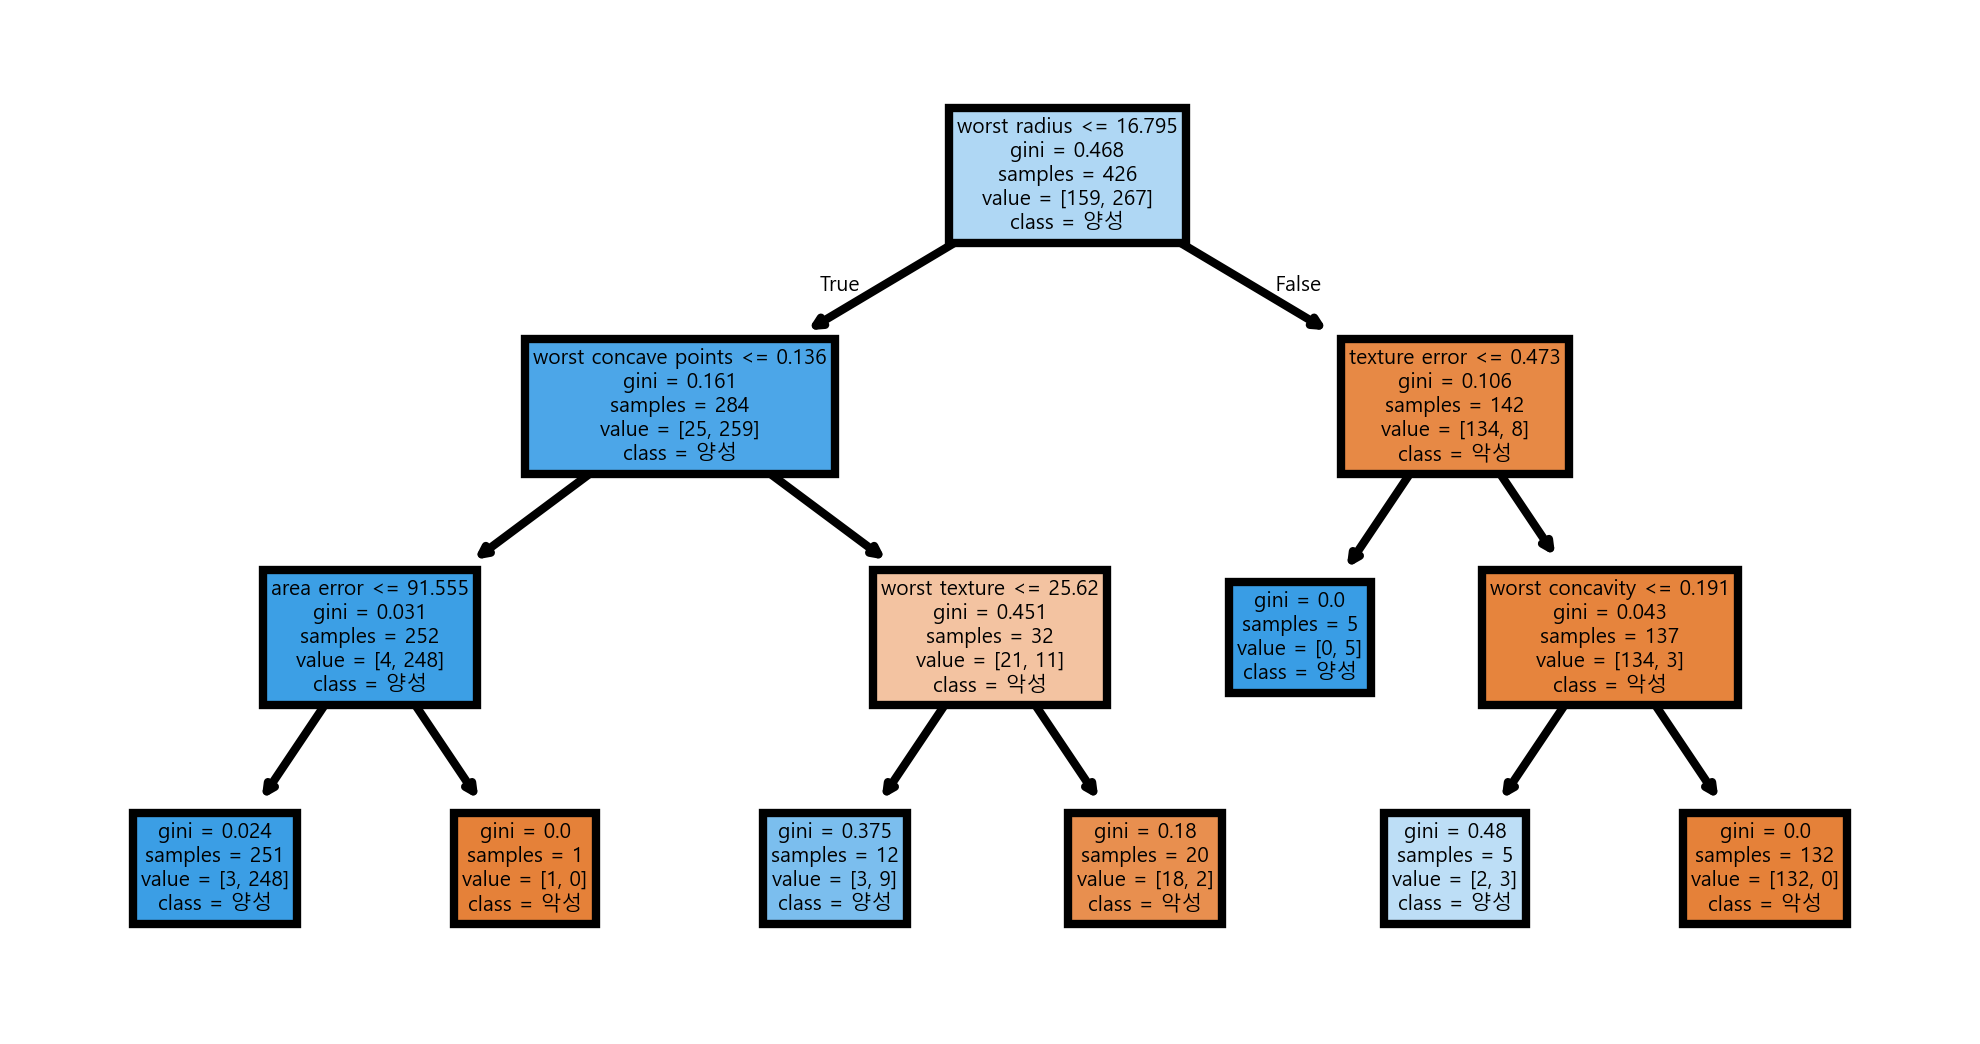

In [12]:
# 장단이 있다 우리가 보기엔 좋지만 이후에 출력물에 첨부할 때 뿌옇게 보이고 깨진다
from sklearn.tree import plot_tree
plt.figure(figsize=(4, 2))
plot_tree(dt,
          class_names=["악성", "양성"], 
          feature_names=cancer.feature_names,
          filled=True)
plt.show()

### DT-Q4. 트리의 특성 중요도를 출력하고, 시각적으로 표현하세요.
- [V] DT-Q4(a). 트리의 특성 중요도를 출력하세요.

In [13]:
dt.feature_importances_

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.05 , 0.   , 0.011, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.758, 0.035, 0.   , 0.   , 0.   , 0.   , 0.019,
       0.127, 0.   , 0.   ])

- [ ] DT-Q4(b). 특성 중요도를 그래프로 생성하세요.

축에 뭐가 들어가야하지?

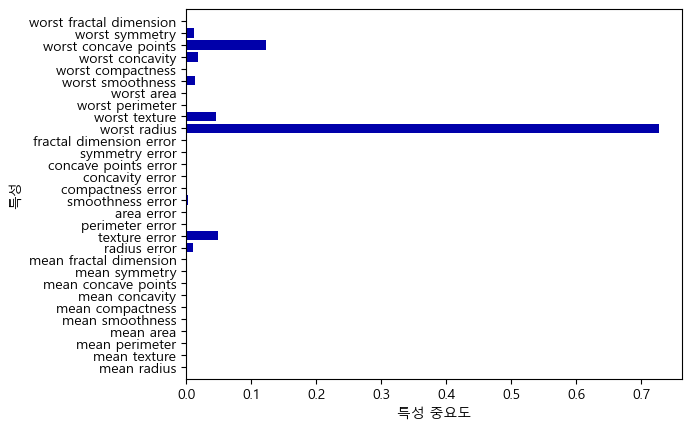

In [ ]:
# 책에 있음 보고 해봐

### mglearn 라이브러리의 plots 모듈의 `plot_tree_not_monotone` 함수를 실행하세요.

Feature importances: [0. 1.]


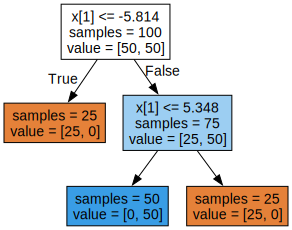

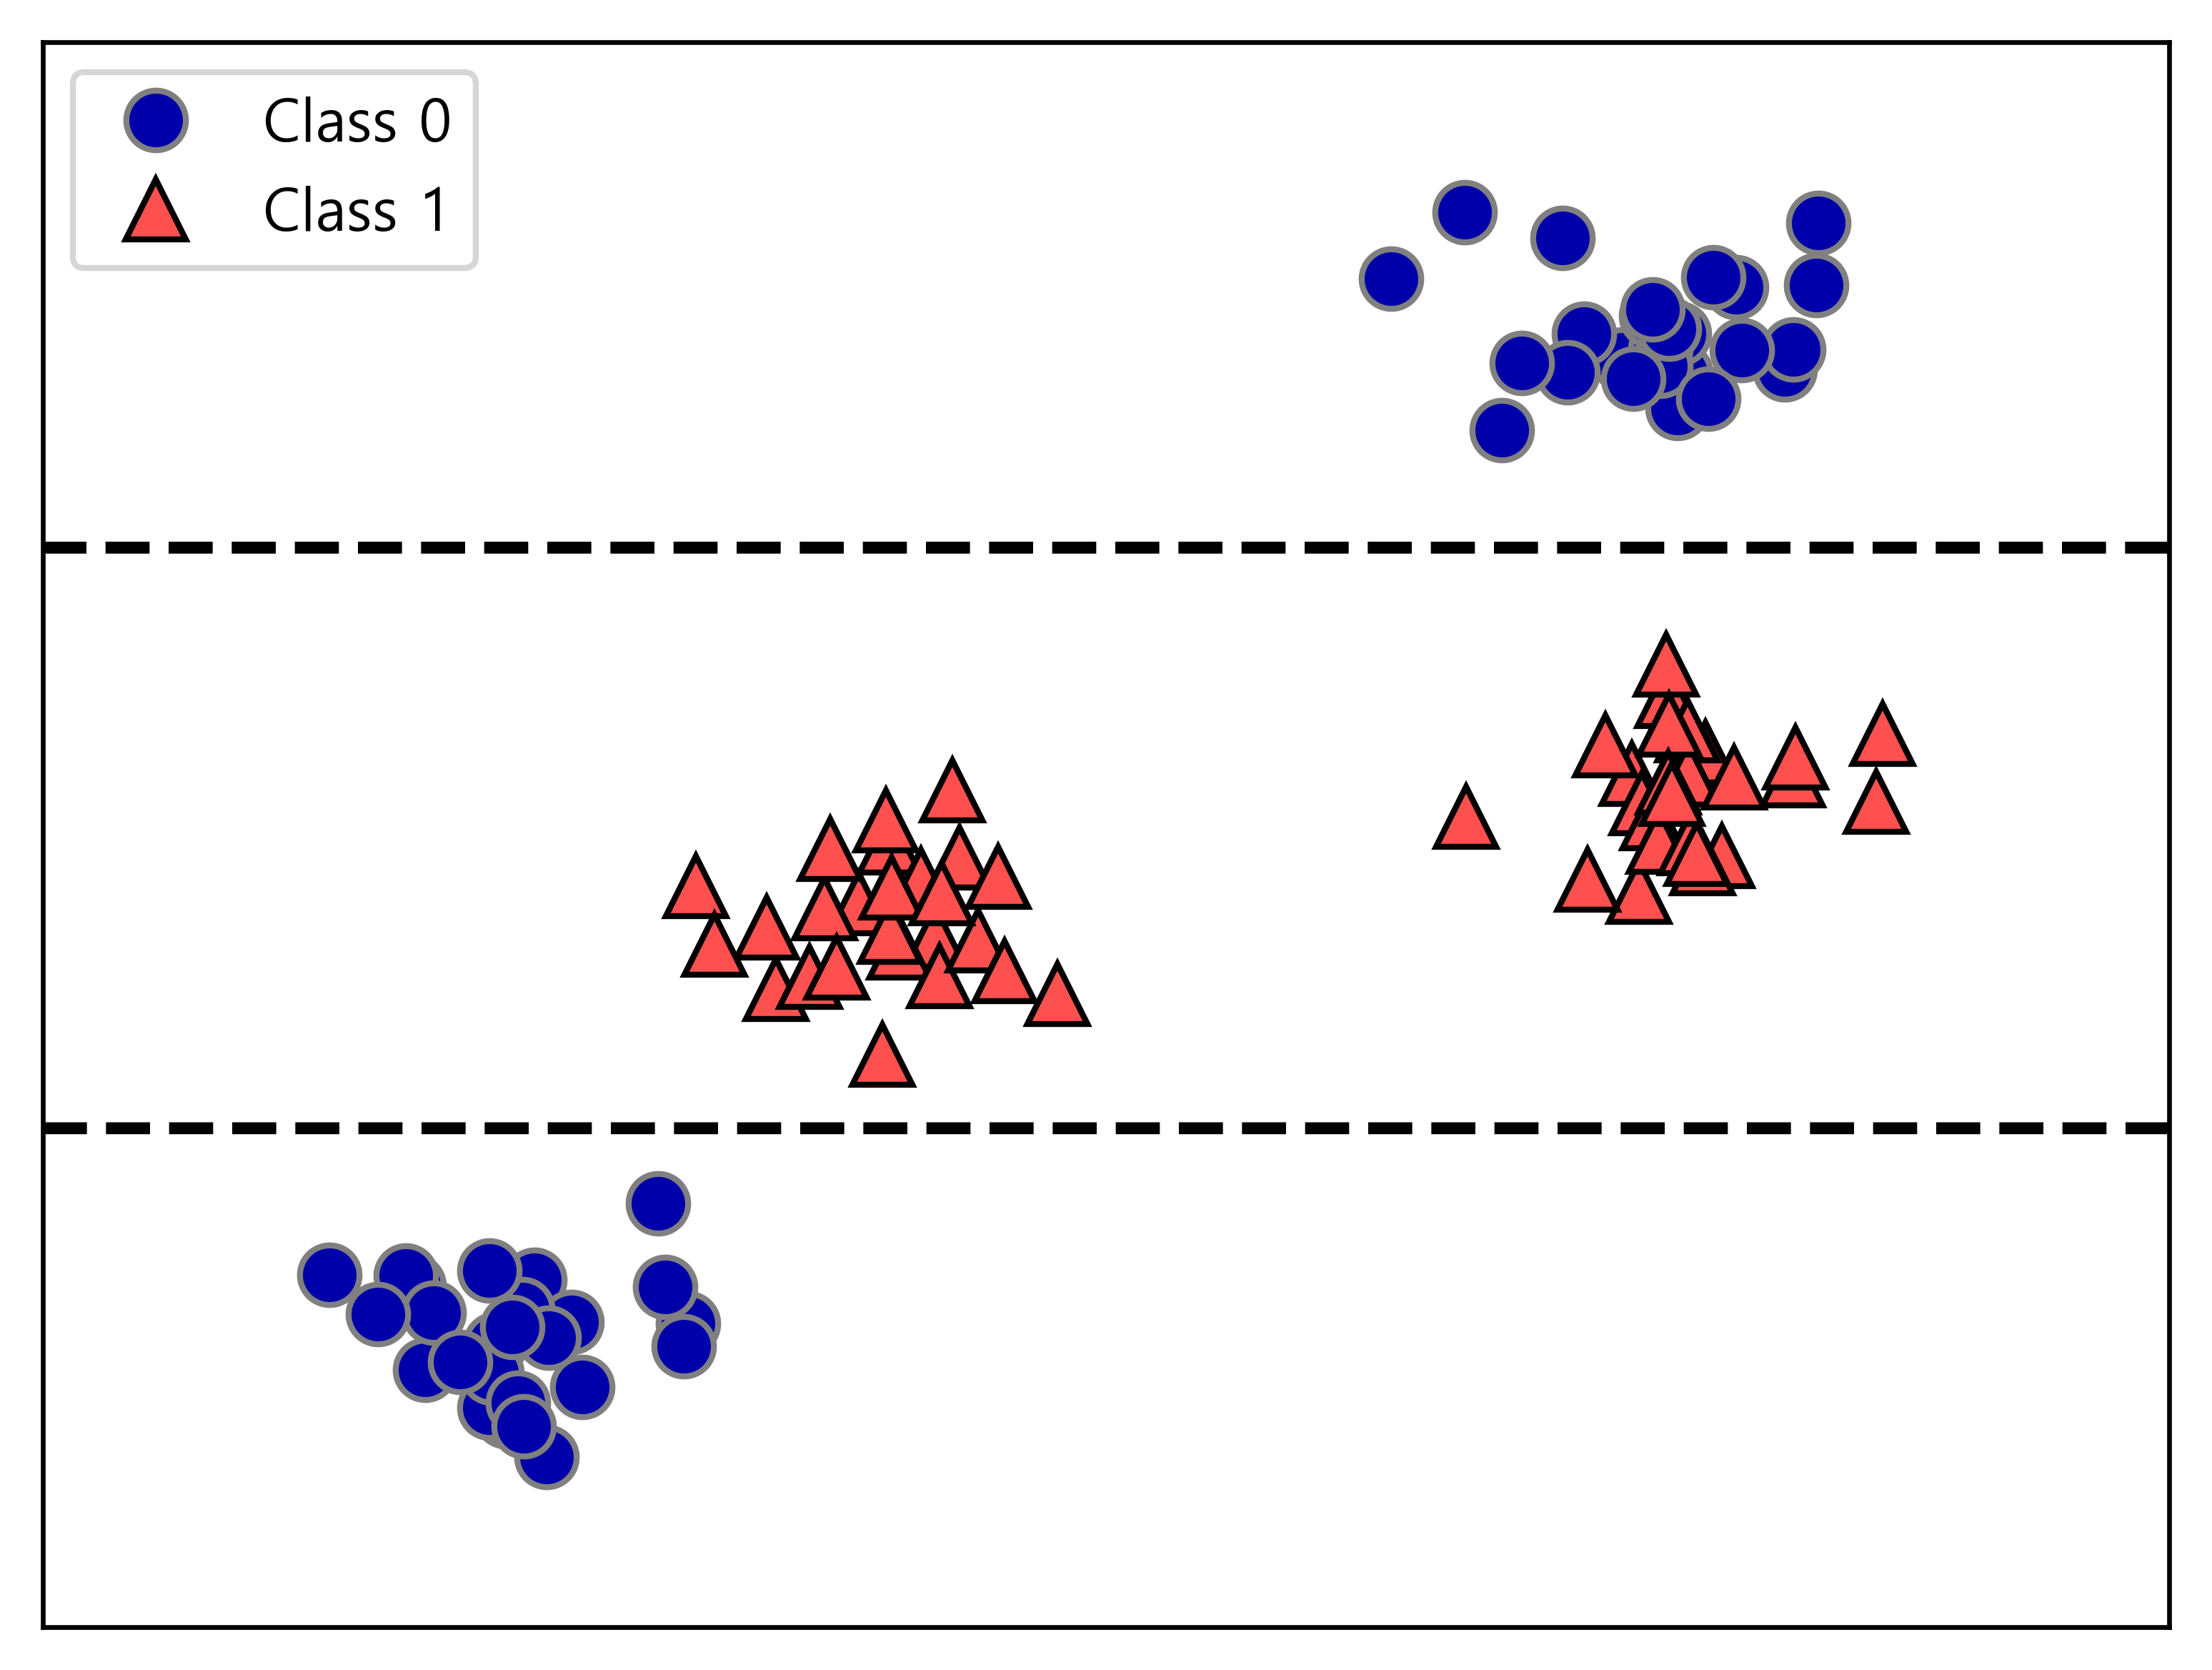

In [14]:
mglearn.plots.plot_tree_not_monotone()

## 결정 트리를 활용한 회귀

### DT-Q5 결정트리를 사용해서 `ram_price`을 분석하여, 가격을 예측하세요.
- [ ] DT-Q5(a). pandas를 사용해서 "ram_price.csv" 파일을 `ram_prices` 객체를 생성하세요.

NameError: name 'dt' is not defined

- [ ] DT-Q5(b). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - y축의 지수에 `-`값을 표현할 수 없기 때문에 y축의 폰트를 `consolas`로 변경하세요.
    - x축과 y축에 label을 표시하세요("년" / "가격 ($/Mbyte)")
    - 일반적인 선 그래프를 사용하세요.   

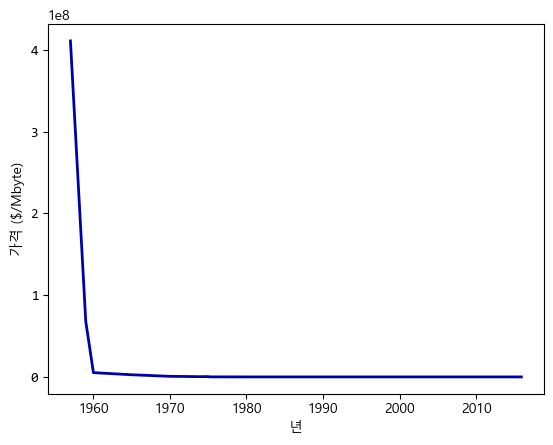

- [ ] DT-Q5(c). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - 해당 그래프를 `log` 그래프로 변경하세요.

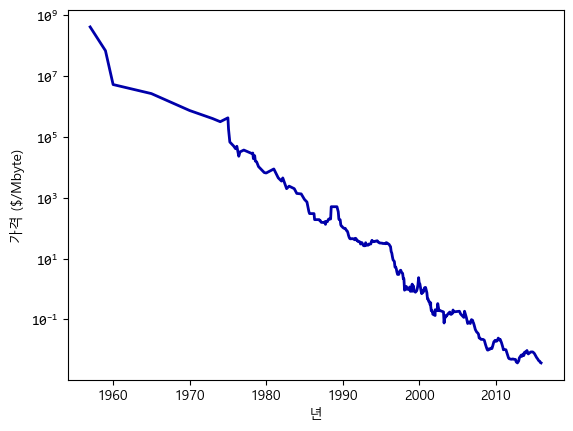

- [ ] DT-Q5(d). 학습데이터와 테스트 데이터를 분리하세요.
    - 학습 데이터는 1999년까지 데이터를 사용하세요.
    - 테스트 데이터는 1999년 이후 데이터를 사용하세요.

- [ ] DT-Q5(e). 학습데이터와 테스트 데이터를 분류하여 작성하세요.
    - y값은 log 함수를 적용하세요.

- [ ] DT-Q5(f). 결정트리의 회귀와 선형 회귀 예측기를 생성하고, 데이터에 학습을 진행하세요.
    - tree
    - linear_reg

- DT-Q5(g). 두 예측기에 테스트를 진행하세요.
    - 테스트에 사용되는 데이터는 모든 데이터를 활용하세요.

- DT-Q5(h). 예측된 값을 log로 변환하세요.

- DT-Q5(i). 기존 데이터와 예측 데이터 모두를 시각화하세요.

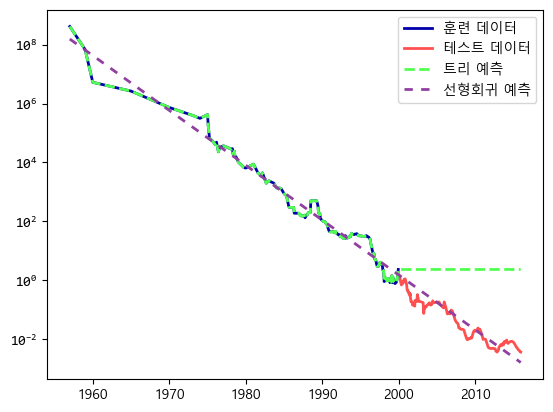